# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 3
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_3D_modisa_3.csv
out_filename: df_chl_out_3D_modisa_4.csv


,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.000000,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.45200
10648,34721,2002-11-04,12.628833,0.001778,0.000122,6.291000,13.099250,-0.428083,0.000064,29.590750,67.626250,0.129693,-0.887083,-0.024359,NaN,509.24500
10879,10206,2002-11-07,11.064250,1000.000000,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.67500
10881,11089,2002-11-07,14.365167,0.003795,0.000151,-15.957833,16.718083,1.865000,0.000075,28.995083,64.770000,0.192121,-0.716425,0.033696,-1.472422,859.72600
10883,15707,2002-11-07,13.640333,1000.000000,0.000132,-15.104667,29.831500,-24.346083,0.000068,NaN,67.346250,0.158005,-0.801329,-0.008466,NaN,573.15900
10897,34315,2002-11-07,5.700083,0.004677,0.000116,-46.239333,53.404667,15.849750,0.000059,29.688667,57.189833,0.118153,-0.927555,-0.021739,NaN,807.01100
10901,34710,2002-11-07,17.340000,0.001818,0.000190,-2.268917,12.218750,11.470250,0.000091,28.845500,63.155917,0.375238,-0.425694,-0.069839,NaN,562.59100
10907,34721,2002-11-07,12.584833,0.001786,0.000096,11.166083,15.920500,-2.891250,0.000052,29.468167,67.824667,0.148202,-0.829147,0.018509,-1.732629,487.07000
11138,10206,2002-11-10,11.149750,1000.000000,0.002349,1.226750,2.176333,0.621000,0.000731,NaN,67.124333,0.125101,-0.902739,-0.003900,NaN,540.82800


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

6.860844900015428e-15

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.000000,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.452,0.039391
10648,34721,2002-11-04,12.628833,0.001778,0.000122,6.291000,13.099250,-0.428083,0.000064,29.590750,67.626250,0.129693,-0.887083,-0.024359,NaN,509.245,-0.062607
10879,10206,2002-11-07,11.064250,1000.000000,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.675,-0.042806
10881,11089,2002-11-07,14.365167,0.003795,0.000151,-15.957833,16.718083,1.865000,0.000075,28.995083,64.770000,0.192121,-0.716425,0.033696,-1.472422,859.726,0.058463
10883,15707,2002-11-07,13.640333,1000.000000,0.000132,-15.104667,29.831500,-24.346083,0.000068,NaN,67.346250,0.158005,-0.801329,-0.008466,NaN,573.159,-0.017860


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    739.000000
mean      -0.121453
std        0.758143
min      -10.428087
25%       -0.077504
50%       -0.004309
75%        0.059677
max        0.321857
Name: chlor_a_logE_rate, dtype: float64

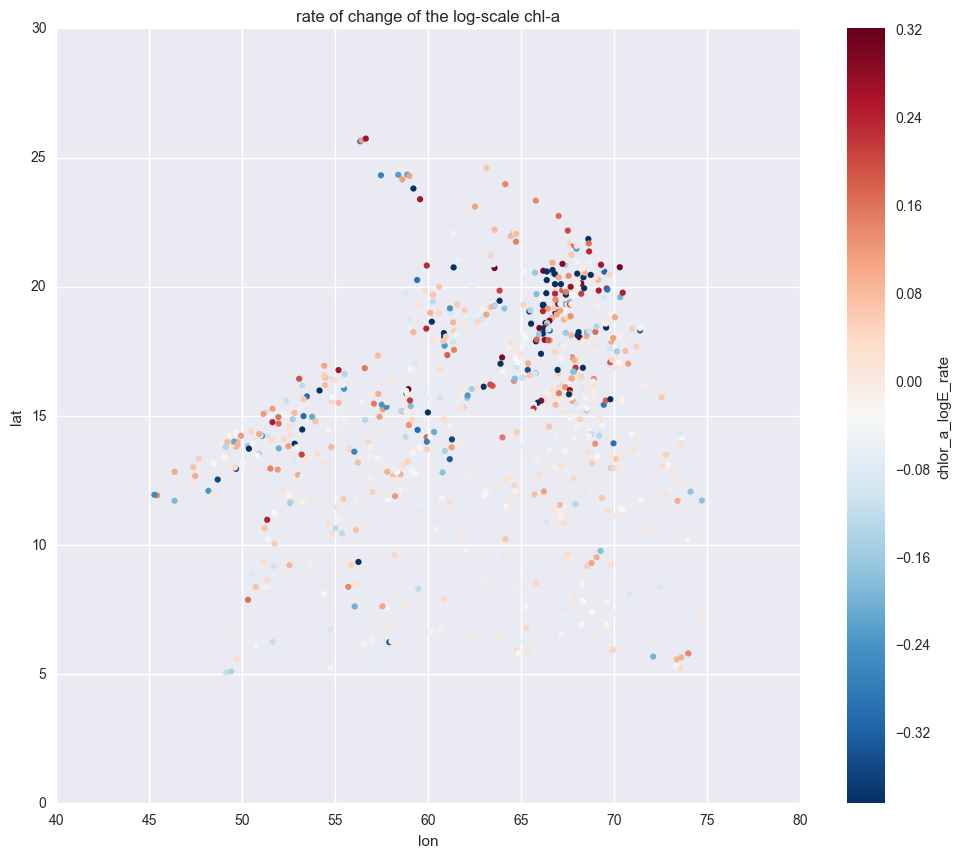

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

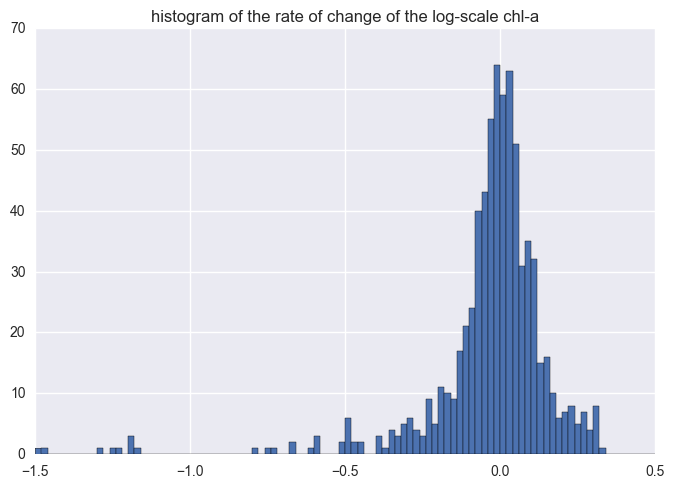

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

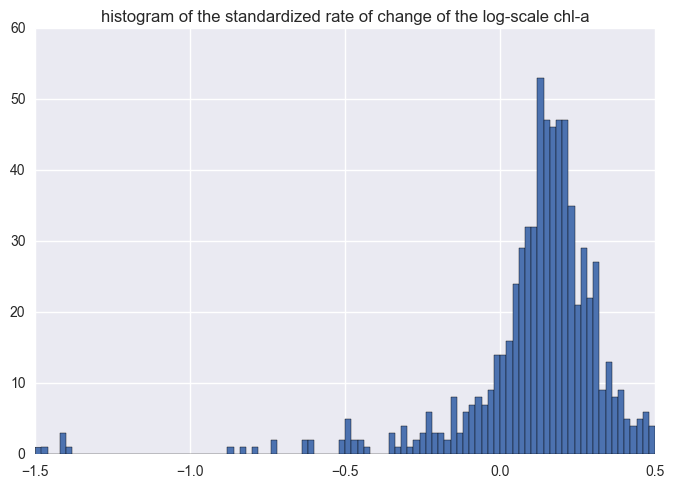

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [12]:
(0.129001 - 0.145567) / (freq*0.129001)

-0.042805869721940136

In [10]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:10206, time:2002-11-07"
# (0.129001 - 0.145567) / (freq*0.129001)    == -0.042805869721940136
#########
# Val 2:
# id:10206, time:2002-11-07"
# (np.log(0.129001)-np.log(0.145567))   / freq == -0.040272101817569204 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.0,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.452,0.039391
10879,10206,2002-11-07,11.064250,1000.0,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.675,-0.042806
11138,10206,2002-11-10,11.149750,1000.0,0.002349,1.226750,2.176333,0.621000,0.000731,NaN,67.124333,0.125101,-0.902739,-0.003900,NaN,540.828,-0.010392
12692,10206,2002-11-28,11.322667,1000.0,0.000845,-5.209000,5.937833,2.495417,0.000307,NaN,66.894750,0.132228,-0.878677,-0.001016,NaN,567.108,-0.002561
12951,10206,2002-12-01,11.384667,1000.0,0.003508,-11.984083,12.573333,3.490667,0.001023,NaN,66.684000,0.139830,-0.854400,0.007602,-2.119073,589.045,0.018122


In [13]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.0,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.452,0.039391
10879,10206,2002-11-07,11.064250,1000.0,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.675,-0.042806
11138,10206,2002-11-10,11.149750,1000.0,0.002349,1.226750,2.176333,0.621000,0.000731,NaN,67.124333,0.125101,-0.902739,-0.003900,NaN,540.828,-0.010392
12692,10206,2002-11-28,11.322667,1000.0,0.000845,-5.209000,5.937833,2.495417,0.000307,NaN,66.894750,0.132228,-0.878677,-0.001016,NaN,567.108,-0.002561
12951,10206,2002-12-01,11.384667,1000.0,0.003508,-11.984083,12.573333,3.490667,0.001023,NaN,66.684000,0.139830,-0.854400,0.007602,-2.119073,589.045,0.018122


In [14]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_3D_modisa_4.csv


,id,time,lat,var_tmp,var_lon,ve,spd,vn,var_lat,temp,lon,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
10620,10206,2002-11-04,10.885583,1000.0,0.001747,-6.069667,11.224333,6.904000,0.000579,NaN,67.315250,0.145567,-0.836937,0.017202,-1.764421,524.452,0.039391
10879,10206,2002-11-07,11.064250,1000.0,0.000558,-5.759333,10.497583,6.697417,0.000221,NaN,67.174083,0.129001,-0.889407,-0.016566,NaN,536.675,-0.042806
11138,10206,2002-11-10,11.149750,1000.0,0.002349,1.226750,2.176333,0.621000,0.000731,NaN,67.124333,0.125101,-0.902739,-0.003900,NaN,540.828,-0.010392
12692,10206,2002-11-28,11.322667,1000.0,0.000845,-5.209000,5.937833,2.495417,0.000307,NaN,66.894750,0.132228,-0.878677,-0.001016,NaN,567.108,-0.002561
12951,10206,2002-12-01,11.384667,1000.0,0.003508,-11.984083,12.573333,3.490667,0.001023,NaN,66.684000,0.139830,-0.854400,0.007602,-2.119073,589.045,0.018122


In [15]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


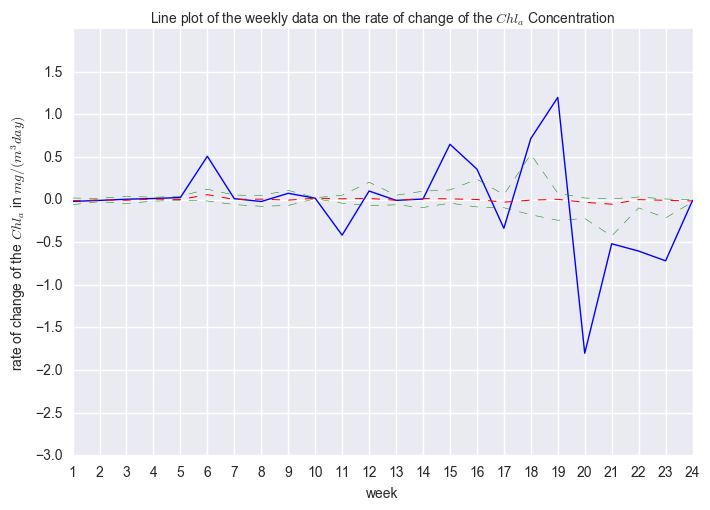

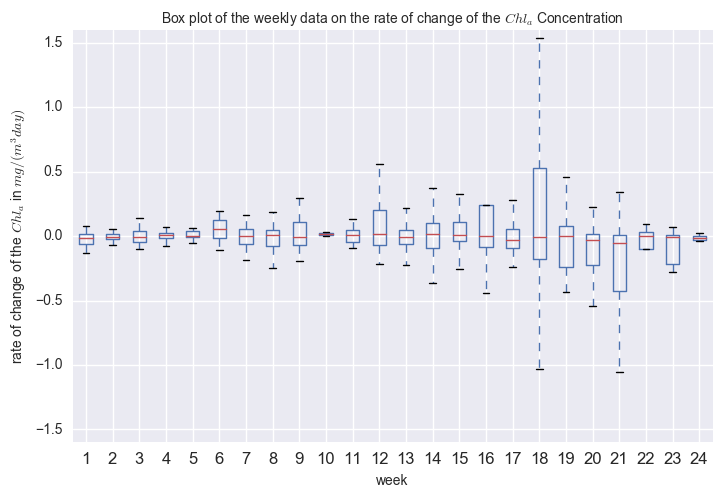

In [16]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

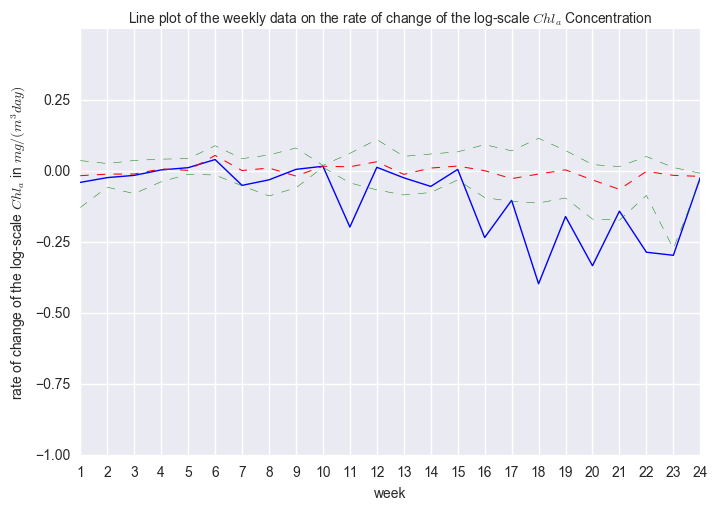

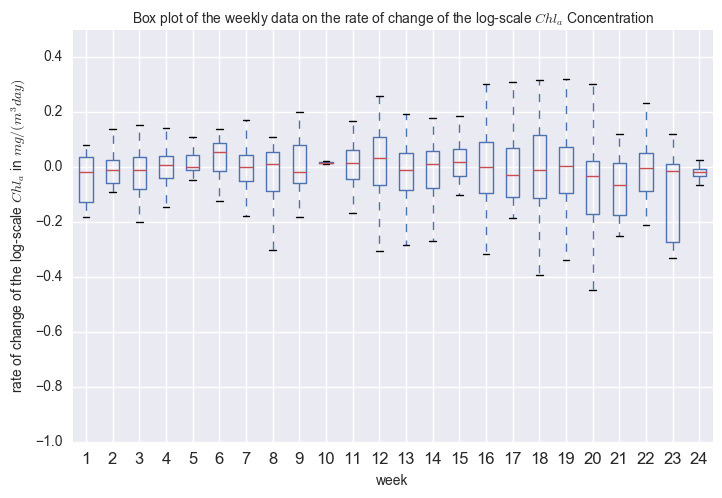

In [17]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [18]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    101.000000
mean       0.000854
std        0.070760
min       -0.178500
25%       -0.029405
50%       -0.004043
75%        0.026300
max        0.257682
Name: chl_rate, dtype: float64


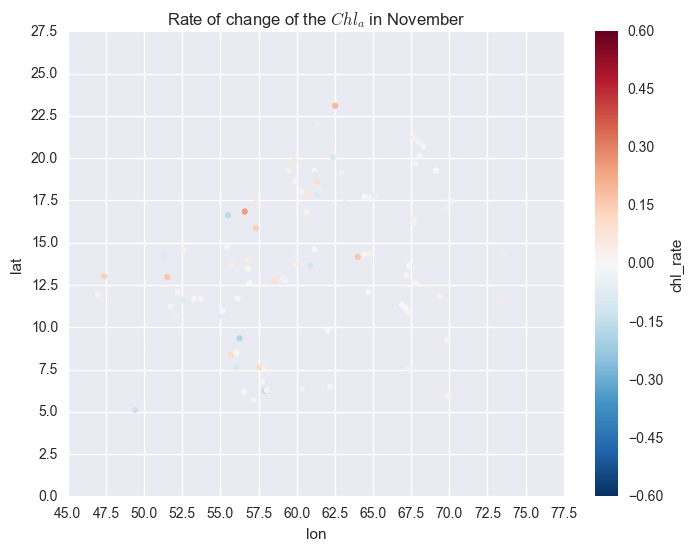



 summary of the Chl_rate 
 count    126.000000
mean       0.103577
std        0.870768
min       -1.212929
25%       -0.054818
50%        0.007898
75%        0.083648
max        9.450878
Name: chl_rate, dtype: float64


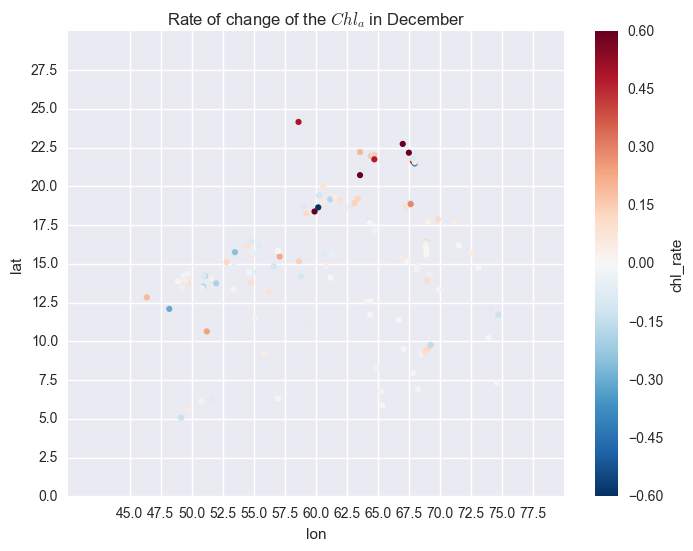



 summary of the Chl_rate 
 count    178.000000
mean      -0.092638
std        1.452385
min      -18.524991
25%       -0.061779
50%        0.005437
75%        0.090876
max        2.960363
Name: chl_rate, dtype: float64


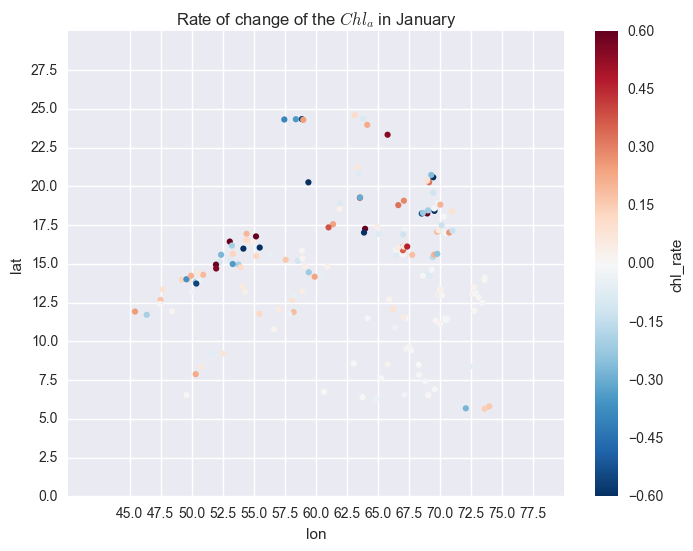



 summary of the Chl_rate 
 count    178.000000
mean       0.353711
std        6.403601
min      -42.178406
25%       -0.101225
50%       -0.004184
75%        0.313860
max       38.302670
Name: chl_rate, dtype: float64


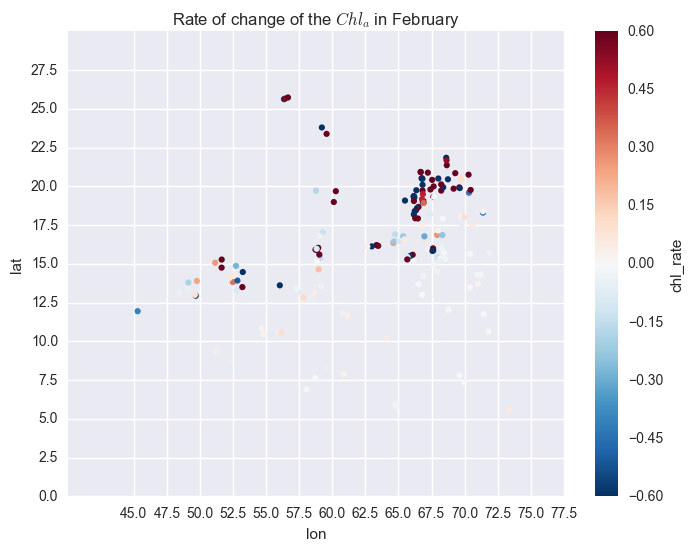



 summary of the Chl_rate 
 count    156.000000
mean      -0.474700
std        5.669407
min      -30.210748
25%       -0.219846
50%       -0.015016
75%        0.023531
max       40.143596
Name: chl_rate, dtype: float64


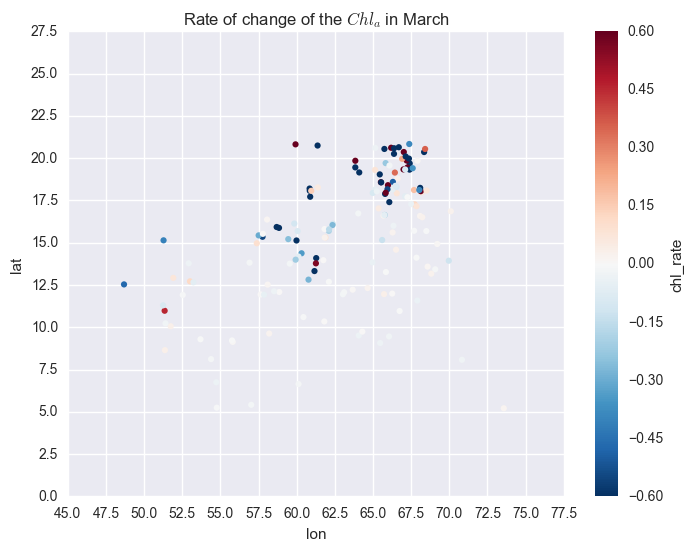

In [19]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [20]:
print("test")

test
